# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA)
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the date into training and test sets.
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm
!pip install gdown
!gdown 'https://drive.google.com/uc?id=1DRiPp0_Ylnq9huxXnxGup92RRKH6kdIo'
!unzip 'ATnT.zip'
# !mv ATnT/* ./
# !rm -r ATnT
!rm ATnT.zip

Downloading...
From: https://drive.google.com/uc?id=1DRiPp0_Ylnq9huxXnxGup92RRKH6kdIo
To: /content/ATnT.zip
100% 3.81M/3.81M [00:00<00:00, 16.8MB/s]
Archive:  ATnT.zip
   creating: ATnT/
   creating: ATnT/s39/
  inflating: ATnT/s39/10.pgm         
  inflating: ATnT/s39/9.pgm          
  inflating: ATnT/s39/8.pgm          
  inflating: ATnT/s39/2.pgm          
  inflating: ATnT/s39/7.pgm          
  inflating: ATnT/s39/1.pgm          
  inflating: ATnT/s39/6.pgm          
  inflating: ATnT/s39/5.pgm          
  inflating: ATnT/s39/4.pgm          
  inflating: ATnT/s39/3.pgm          
   creating: ATnT/s16/
  inflating: ATnT/s16/6.pgm          
  inflating: ATnT/s16/10.pgm         
  inflating: ATnT/s16/9.pgm          
  inflating: ATnT/s16/8.pgm          
  inflating: ATnT/s16/2.pgm          
  inflating: ATnT/s16/7.pgm          
  inflating: ATnT/s16/1.pgm          
  inflating: ATnT/s16/5.pgm          
  inflating: ATnT/s16/4.pgm          
  inflating: ATnT/s16/3.pgm          
   crea

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

# TASK -**1**

In [2]:
# iterate through all folders, load each image
import numpy as np
import matplotlib.pyplot as plt

trainAmt = 0.9
allFaces = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join("ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)
       # print(img.shape)
        allFaces.append(img)
        labels.append(i)

# shuffle
randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

# split
trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)): ]
testLabels = labels[int(trainAmt*len(allFaces)): ]

# 112x92 (= 10304) grayscale images,  360 in train, 40 in test
print(testFaces.shape, trainLabels.shape)

(40, 112, 92) (360,)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

# **TASK -2**

In [3]:

def principalComponentAnalysis(X):   #pca
    centered_X = X - np.mean(X,axis=0) #subtracting mean
    covariance_matrix = np.cov(centered_X, rowvar=False) #covariance
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix) #eigons
    sorted_indices = np.argsort(eigenvalues)[::-1] #sort it reversely
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    return eigenvectors                                    #return vectors
eigenvectors = principalComponentAnalysis(trainFaces.reshape((len(trainFaces), -1)))  #call pca


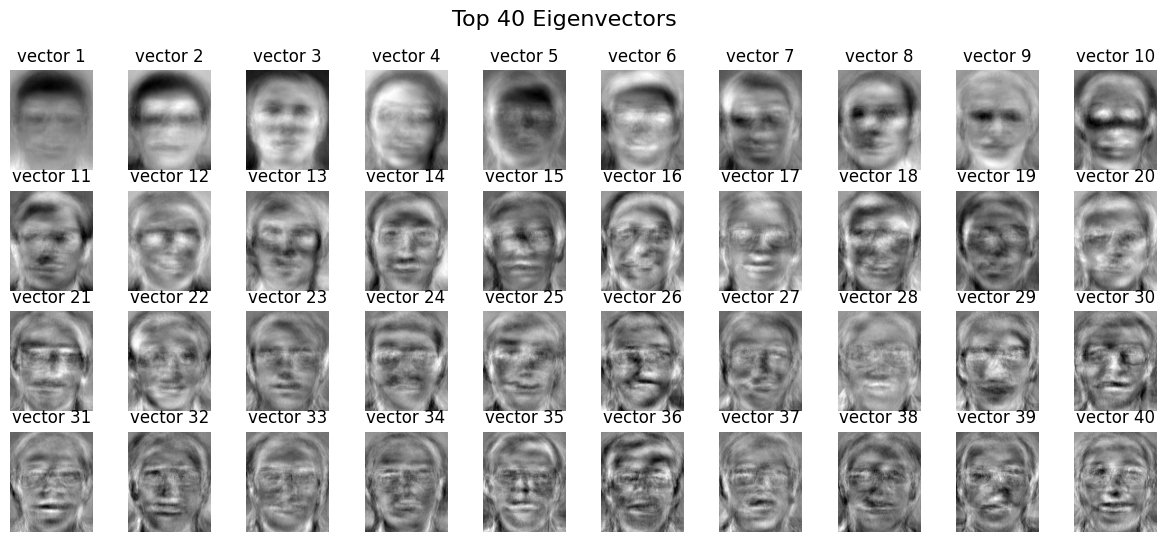

In [5]:
top_40_eigenvectors = eigenvectors[:, :40]   #take top 40
fig, axes = plt.subplots(4, 10, figsize=(15, 6))   #plotting
fig.suptitle('Top 40 Eigenvectors', fontsize=16)
for i, ax in enumerate(axes.flatten()):
    eigenvector = top_40_eigenvectors[:, i].reshape((112, 92))
    ax.imshow(eigenvector, cmap='gray')
    ax.set_title(f'vector {i+1}')
    ax.axis('off')
plt.show()





**BRIEF EXPLANATION OF THE STEPS INVOLVED**

1. The process involves centering the data, computing its covariance matrix, and finding the covariance matrix's eigenvalues and eigenvectors.

2. Eigenvectors represent the PCs, sorted by their eigenvalues in descending order to emphasize those with the most variance.

3. The top 40 eigenvectors are visualized, showing the most significant patterns/features in the dataset.

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

# **TASK -3**

**Explanation of the method**

**Mean Face Calculation:** The mean face is calculated by taking the average of all the face images in the training set. This provides a representative face that captures the common characteristics of the faces in the dataset.

**Image Reconstruction:** For each test face, the algorithm reconstructs it by projecting it onto the eigenspace spanned by the top eigenfaces. This is achieved by calculating the weights of the test face projection onto the eigenfaces and then reconstructing the face using these weights along with the mean face.

**Visualization:** Then, the original test faces and their corresponding reconstructed faces are visualized as shown in the image. Also, i have visualised mean Eigen face as per the requirement mentioned in the task.


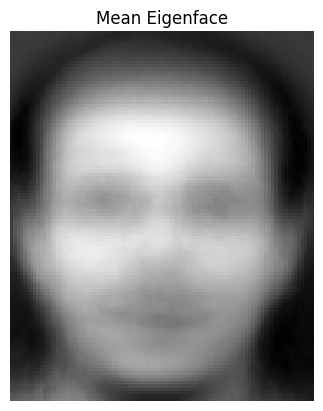

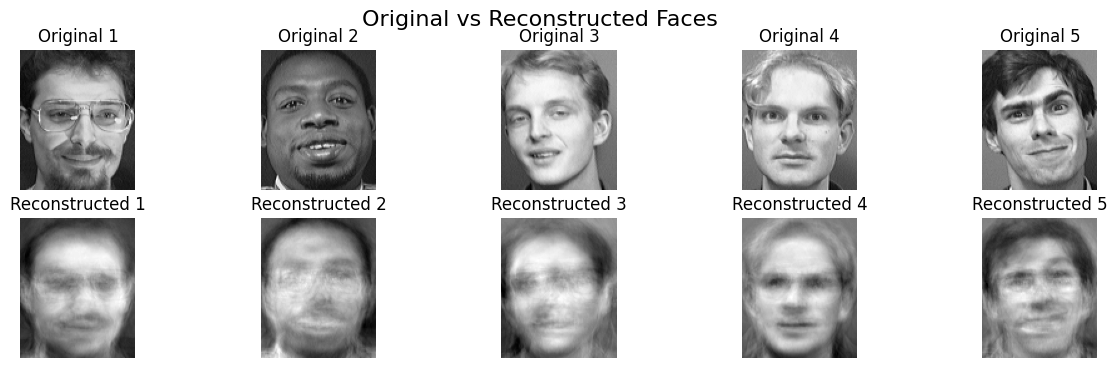

In [6]:
def imageReconstruction(testFace, eigenFaces, meanFace):

    testFace_flattened = testFace.flatten()  #Flatten the test face
    centeredTestFace = testFace_flattened - meanFace #  Subtract the mean face
    weights = np.dot(eigenFaces.T, centeredTestFace) # Calculate the weights
    reconstructedFace_flattened = meanFace + np.dot(eigenFaces, weights) #  Reconstruct the face
    reconstructedFace = reconstructedFace_flattened.reshape(testFace.shape) #reshape
    return reconstructedFace

meanFace = np.mean(trainFaces, axis=0).flatten() #meanface calculation from training set
disp_mean = np.mean(trainFaces, axis=0) #mean_face

plt.imshow(disp_mean, cmap='gray')
plt.title('Mean Eigenface')
plt.axis('off')
plt.show()


reconstructedFaces = []

for testFace in testFaces:
    reconstructedFace = imageReconstruction(testFace, top_40_eigenvectors, meanFace)
    reconstructedFaces.append(reconstructedFace) #apending reconstructed faces

num_examples = 5   #displaying first 5 out of that
fig, axes = plt.subplots(2, num_examples, figsize=(15, 4))
fig.suptitle('Original vs Reconstructed Faces', fontsize=16)

for i in range(num_examples):
    axes[0, i].imshow(testFaces[i], cmap='gray')   #original
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original {i+1}')

    axes[1, i].imshow(reconstructedFaces[i], cmap='gray') #reconstructed
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Reconstructed {i+1}')

plt.show()




#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

# **TASK - 4**

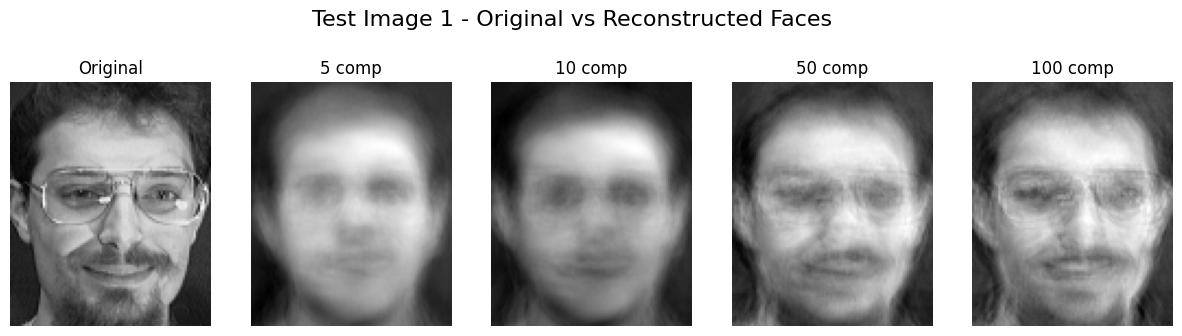

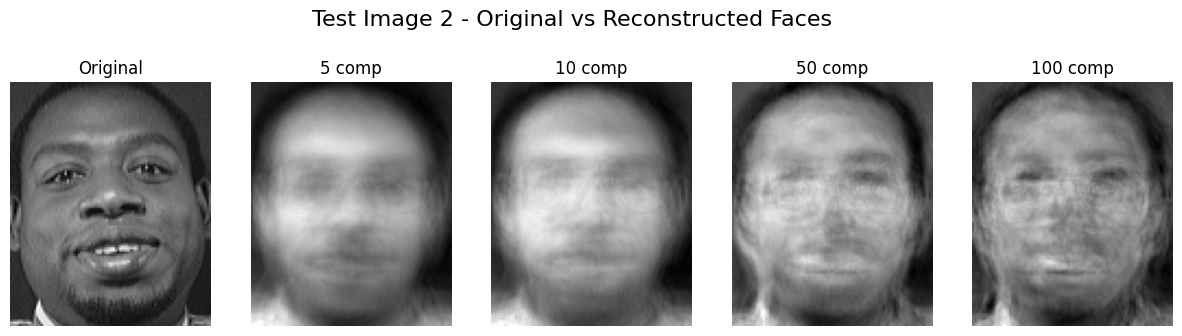

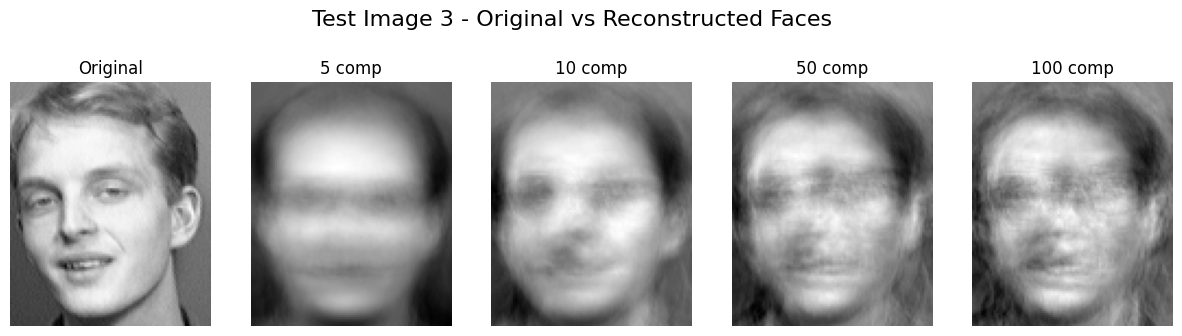

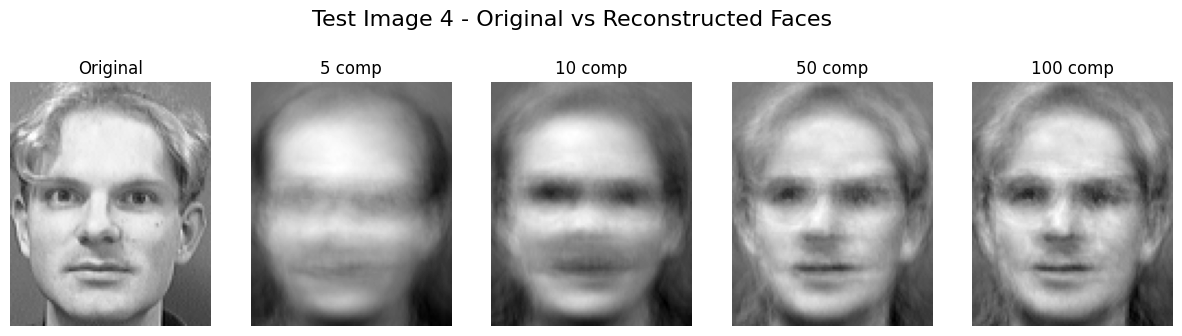

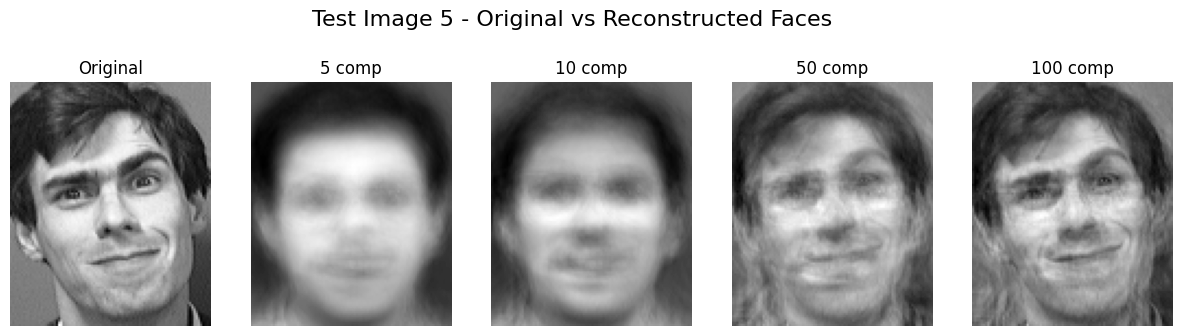

In [7]:

def displayNfactors():

    num_factors_list = [5, 10, 50, 100]
    num_examples = 5

    for i in range(num_examples):
        testFace = testFaces[i]
        reconstructedFaces = []
        for num_factors in num_factors_list:
            top_nfactors_eigenvectors = eigenvectors[:, :num_factors]
            reconstructedFace = imageReconstruction(testFace, top_nfactors_eigenvectors, meanFace)
            reconstructedFaces.append(reconstructedFace)
        fig, axes = plt.subplots(1, len(num_factors_list) + 1, figsize=(15, 4))
        fig.suptitle(f'Test Image {i+1} - Original vs Reconstructed Faces', fontsize=16)
        axes[0].imshow(testFace, cmap='gray')
        axes[0].axis('off')
        axes[0].set_title('Original')
        for j, num_factors in enumerate(num_factors_list):
            axes[j+1].imshow(reconstructedFaces[j], cmap='gray')
            axes[j+1].axis('off')
            axes[j+1].set_title(f'{num_factors} comp')
        plt.show()
displayNfactors()




#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them.
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations.
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [8]:
def getClass(testImage, eigenvectors, meanEigenFace, X_train, y_train):
    centeredTestImage = testImage.flatten() - meanEigenFace  #Center the test image
    testProjection = np.dot(centeredTestImage, eigenvectors) #Project the centered test image
    X_train_flattened = X_train.reshape(len(X_train), -1)   #Flatten and center the training images
    centered_X_train = X_train_flattened - meanEigenFace
    trainProjections = np.dot(centered_X_train, eigenvectors)
    diffs = trainProjections - testProjection
    errors = np.linalg.norm(diffs, axis=1)  #Calculate the norm of the differences
    minErrorIndex = np.argmin(errors) #Find the index of the training image
    minErrorImage = X_train[minErrorIndex]
    predictedClass = y_train[minErrorIndex] # Retrieve the predicted class label
    minError = errors[minErrorIndex]
    return minErrorImage, minError, predictedClass  #Return the image with minimum error, the minimum error value, and the predicted class

Iterate through all the images in the test data and test the accuracy by taking different number of components

Number of Components: 3, Accuracy: 72.5, Mean Square Error: 997.5704371864355
Number of Components: 5, Accuracy: 90.0, Mean Square Error: 844.1860253662668
Number of Components: 10, Accuracy: 97.5, Mean Square Error: 675.9862294863026
Number of Components: 20, Accuracy: 97.5, Mean Square Error: 537.5185601180193
Number of Components: 30, Accuracy: 100.0, Mean Square Error: 468.3962569152377
Number of Components: 40, Accuracy: 100.0, Mean Square Error: 422.9057436991774
Number of Components: 50, Accuracy: 100.0, Mean Square Error: 393.404776424262


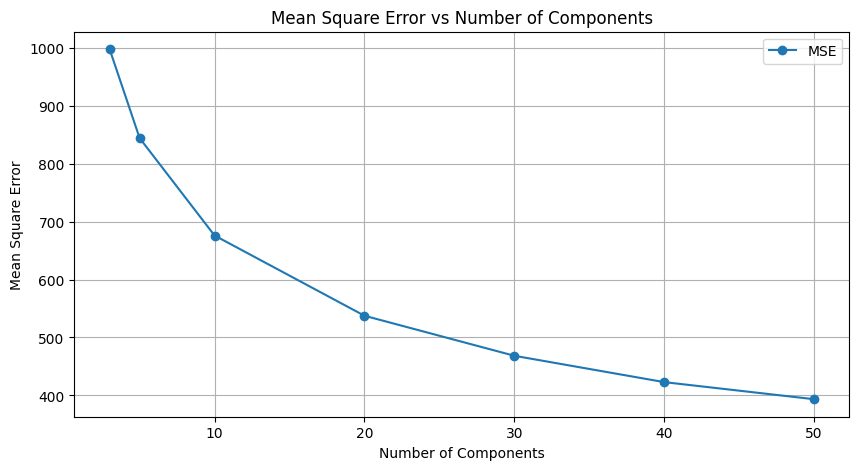

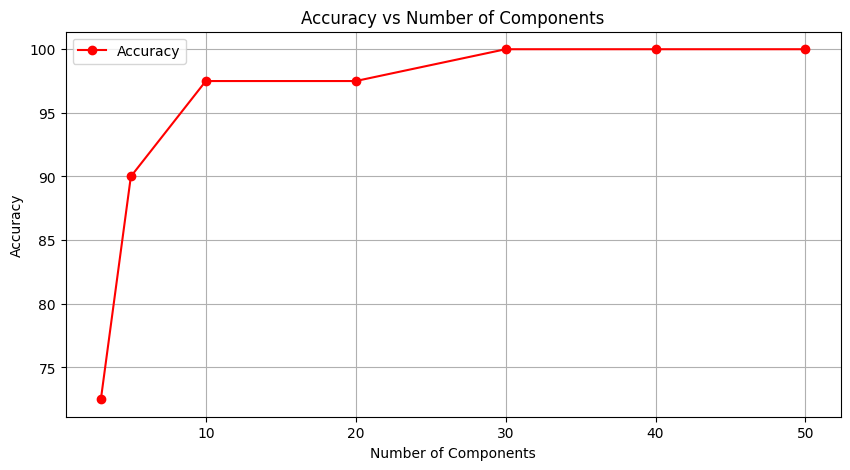

In [9]:
components = [3, 5, 10, 20, 30, 40, 50]
mse = []
accuracy_list = []

for numComponents in components:
    top_eigenvectors = eigenvectors[:, :numComponents]
    correct_predictions = 0
    total_images = len(testFaces)
    total_error = 0

    for i in range(total_images):
        testFace = testFaces[i]
        meanFace = np.mean(trainFaces, axis=0).flatten()
        testFace_flattened = testFace.flatten()
        centeredTestFace = testFace_flattened - meanFace
        weights = np.dot(top_eigenvectors.T, centeredTestFace)
        reconstructedTestFace_flattened = meanFace + np.dot(top_eigenvectors, weights)
        reconstructedTestFace = reconstructedTestFace_flattened.reshape(testFace.shape)
        mse_error = np.mean((testFace - reconstructedTestFace) ** 2)
        total_error += mse_error
        minErrorImage, minError, predictedClass = getClass(testFace, top_eigenvectors, meanFace, trainFaces, trainLabels)
        if predictedClass == testLabels[i]:
            correct_predictions += 1

    mse_value = total_error / total_images
    mse.append(mse_value)
    accuracy = (correct_predictions / total_images)*100
    accuracy_list.append(accuracy)
    print(f"Number of Components: {numComponents}, Accuracy: {accuracy}, Mean Square Error: {mse_value}")


######################################################plotting part##################################################33
plt.figure(figsize=(10, 5))
plt.plot(components, mse, marker='o', label='MSE')
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs Number of Components')
plt.legend()
plt.grid(True)
plt.show()
##################################################################################################################################3
plt.figure(figsize=(10, 5))
plt.plot(components, accuracy_list, marker='o', color='red', label='Accuracy')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components')
plt.legend()
plt.grid(True)
plt.show()


Plot Number of eigenvectors vs Mean Square Error

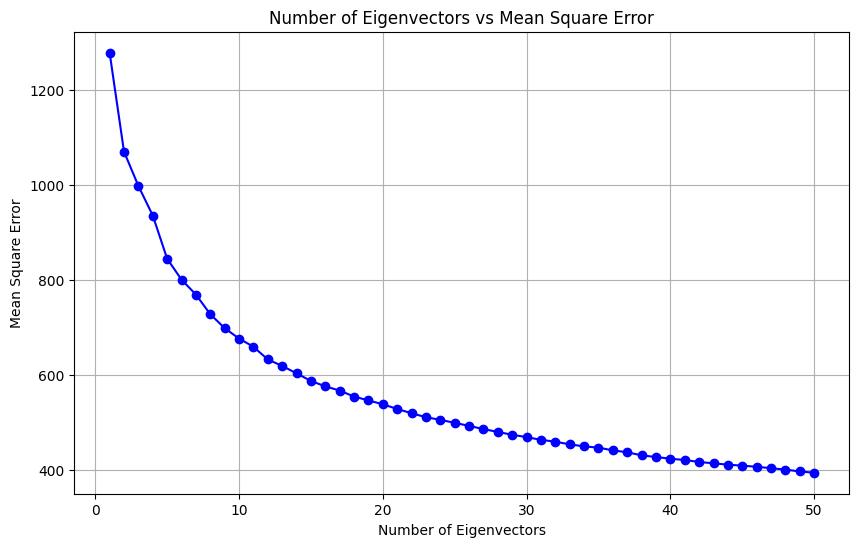

In [10]:
import numpy as np
import matplotlib.pyplot as plt
components_range = range(1, 51)  #range_set
mse_values = []

meanFace = np.mean(trainFaces, axis=0).flatten()

for numComponents in components_range: #iteration begin
    top_eigenvectors = eigenvectors[:, :numComponents]
    total_error = 0
    for i in range(len(testFaces)):
        testFace = testFaces[i].flatten()
        centeredTestFace = testFace - meanFace
        weights = np.dot(top_eigenvectors.T, centeredTestFace)
        reconstructedTestFace = meanFace + np.dot(top_eigenvectors, weights)
        mse_error = np.mean((testFace - reconstructedTestFace) ** 2)
        total_error += mse_error
    mse_value = total_error / len(testFaces)
    mse_values.append(mse_value)

plt.figure(figsize=(10, 6))
plt.plot(components_range, mse_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Mean Square Error')
plt.title('Number of Eigenvectors vs Mean Square Error')
plt.grid(True)
plt.show()


Plot Number of eigenvectors vs Logarithmic Mean Square Error

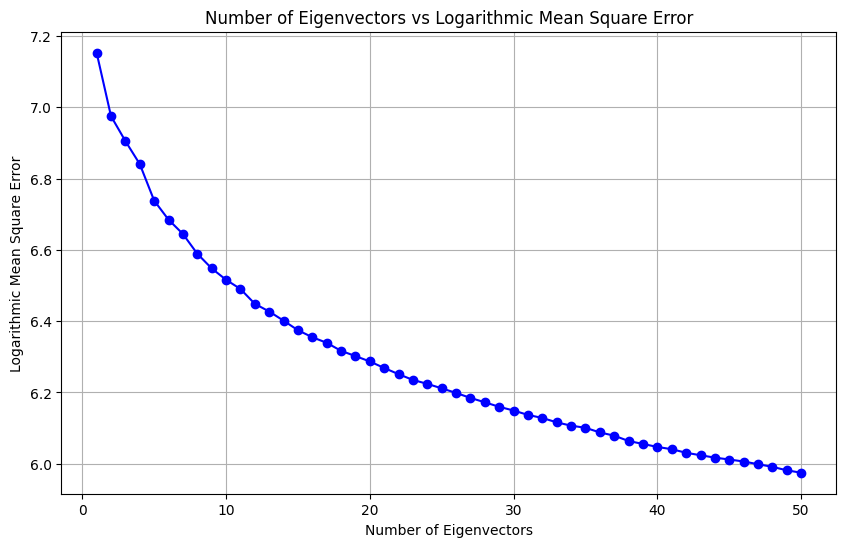

In [11]:
import matplotlib.pyplot as plt
import numpy as np


components_range = range(1, 51)  #rangeset


log_mse_values = []


for numComponents in components_range:  #iterate
    top_eigenvectors = eigenvectors[:, :numComponents]
    meanFace = np.mean(trainFaces, axis=0).flatten()

    total_error = 0
    for i in range(len(testFaces)):
        testFace = testFaces[i].flatten()
        centeredTestFace = testFace - meanFace
        weights = np.dot(top_eigenvectors.T, centeredTestFace)
        reconstructedTestFace = meanFace + np.dot(top_eigenvectors, weights)
        mse_error = np.mean((testFace - reconstructedTestFace) ** 2)
        total_error += mse_error
    mse_value = total_error / len(testFaces)
    log_mse_values.append(np.log(mse_value))


plt.figure(figsize=(10, 6)) # Plot
plt.plot(components_range, log_mse_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Logarithmic Mean Square Error')
plt.title('Number of Eigenvectors vs Logarithmic Mean Square Error')
plt.grid(True)
plt.show()
